In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Data exploration and preparation

In [2]:

train_images = pd.read_csv("csvTrainImages 13440x1024.csv", header=None).values
train_labels = pd.read_csv("csvTrainLabel 13440x1.csv", header=None).values.ravel()

test_images = pd.read_csv("csvTestImages 3360x1024.csv", header=None).values
test_labels = pd.read_csv("csvTestLabel 3360x1.csv", header=None).values.ravel()


In [3]:
len(train_images), len(test_images)

(13440, 3360)

In [4]:
test_images.shape, test_labels.shape, train_labels.shape, train_images.shape

((3360, 1024), (3360,), (13440,), (13440, 1024))

In [5]:
unique_classes, count = np.unique(train_labels, return_counts=True)
number_of_classes = len(unique_classes)
print("Number of unique classes is", number_of_classes)

for i, j in zip(unique_classes, count):
    print(f"Class {i} has {j} samples")

Number of unique classes is 28
Class 1 has 480 samples
Class 2 has 480 samples
Class 3 has 480 samples
Class 4 has 480 samples
Class 5 has 480 samples
Class 6 has 480 samples
Class 7 has 480 samples
Class 8 has 480 samples
Class 9 has 480 samples
Class 10 has 480 samples
Class 11 has 480 samples
Class 12 has 480 samples
Class 13 has 480 samples
Class 14 has 480 samples
Class 15 has 480 samples
Class 16 has 480 samples
Class 17 has 480 samples
Class 18 has 480 samples
Class 19 has 480 samples
Class 20 has 480 samples
Class 21 has 480 samples
Class 22 has 480 samples
Class 23 has 480 samples
Class 24 has 480 samples
Class 25 has 480 samples
Class 26 has 480 samples
Class 27 has 480 samples
Class 28 has 480 samples


In [6]:
train_images = train_images / 255
test_images = test_images / 255

In [7]:
class_mapping = {
    1: 'أ', 2: 'ب', 3: 'ت', 4: 'ث', 5: 'ج', 6: 'ح', 7: 'خ', 8: 'د', 9: 'ذ',
    10: 'ر', 11: 'ز', 12: 'س', 13: 'ش', 14: 'ص', 15: 'ض', 16: 'ط', 17: 'ظ',
    18: 'ع', 19: 'غ', 20: 'ف', 21: 'ق', 22: 'ك', 23: 'ل', 24: 'م', 25: 'ن',
    26: 'ه', 27: 'و', 28: 'ي'
}


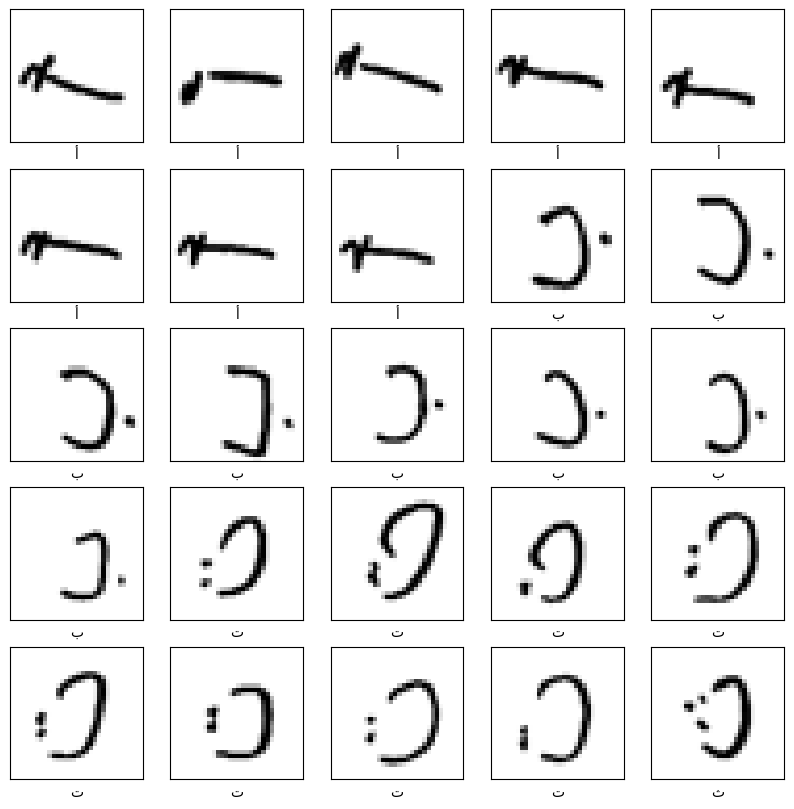

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(32, 32), cmap=plt.cm.binary)
    plt.xlabel(class_mapping[train_labels[i]])
plt.show()

# First experiment: SVM

In [9]:
def display_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(8, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i + 2].reshape(32, 32), cmap='gray')
        true_label = class_mapping[true_labels[i]+1] 
        predicted_label = class_mapping[predicted_labels[i]+1]

        if true_label != predicted_label:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='red')
        else:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='black')

        plt.axis('off')
    plt.show()



In [10]:
svm_model = SVC(kernel="rbf")
svm_model.fit(train_images, train_labels)

predicted = svm_model.predict(test_images)


Accuracy for SVM: 65.3 %
Classification Report:
               precision    recall  f1-score   support

           أ       0.87      0.94      0.90       120
           ب       0.68      0.78      0.73       120
           ت       0.45      0.48      0.47       120
           ث       0.61      0.50      0.55       120
           ج       0.52      0.61      0.56       120
           ح       0.53      0.53      0.53       120
           خ       0.53      0.41      0.46       120
           د       0.54      0.68      0.60       120
           ذ       0.54      0.57      0.56       120
           ر       0.60      0.76      0.67       120
           ز       0.65      0.59      0.62       120
           س       0.72      0.72      0.72       120
           ش       0.79      0.78      0.78       120
           ص       0.61      0.57      0.59       120
           ض       0.63      0.61      0.62       120
           ط       0.61      0.66      0.63       120
           ظ       0.61      0.5

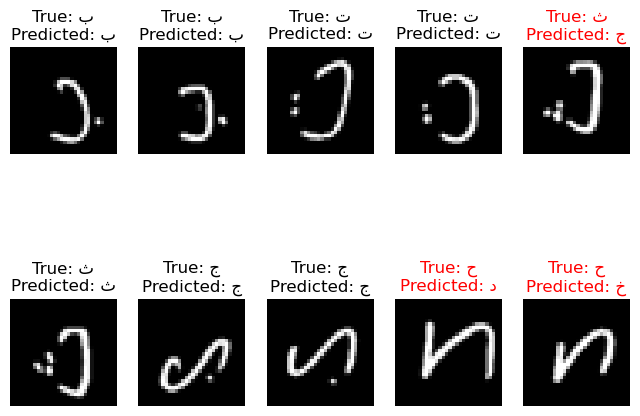

In [11]:
svm_accuracy = accuracy_score(test_labels, predicted)
print("Accuracy for SVM:", round(svm_accuracy * 100, 2), "%")

target_names = [class_mapping[i] for i in sorted(class_mapping.keys())]
report = classification_report(test_labels, predicted, target_names=target_names)
print("Classification Report:\n", report)

display_images(test_images, test_labels, predicted)

# Second experiment: Neural Network

In [12]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [13]:
def create_model_1():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(1024,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(29, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [14]:
def create_model_2():
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(1024,)),
        Dropout(0.4),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(29, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model


In [15]:
train_images_cnn = train_images.reshape(-1, 32, 32, 1)
test_images_cnn = test_images.reshape(-1, 32, 32, 1)


In [16]:
def create_cnn_model():
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(29, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [27]:
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

def perform_kfold_cv(model_creator, X, y, n_splits=5):
    fold_no = 1
    accuracies = []
    
    for train_idx, val_idx in kfold.split(X, np.argmax(y, axis=1)):
        print(f'Training fold {fold_no}...')
        
        model = model_creator()
        
        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X[val_idx]
        y_val_fold = y[val_idx]
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
        history = model.fit(X_train_fold, y_train_fold,
                          epochs=50,
                          batch_size=32,
                          validation_data=(X_val_fold, y_val_fold),
                          callbacks=[early_stopping],
                          verbose=0)
        
        _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        accuracies.append(accuracy)
        print(f'Fold {fold_no} accuracy: {accuracy:.4f}')
        
        fold_no += 1
    
    return np.mean(accuracies), np.std(accuracies)


In [28]:
print("Evaluating Model 1...")
model1_mean_acc, model1_std = perform_kfold_cv(create_model_1, train_images, train_labels_one_hot)
print(f"Model 1 - Mean Accuracy: {model1_mean_acc:.4f} ± {model1_std:.4f}")

print("\nEvaluating Model 2...")
model2_mean_acc, model2_std = perform_kfold_cv(create_model_2, train_images, train_labels_one_hot)
print(f"Model 2 - Mean Accuracy: {model2_mean_acc:.4f} ± {model2_std:.4f}")

print("\nEvaluating CNN Model...")
cnn_mean_acc, cnn_std = perform_kfold_cv(create_cnn_model, train_images_cnn, train_labels_one_hot)
print(f"CNN Model - Mean Accuracy: {cnn_mean_acc:.4f} ± {cnn_std:.4f}")

Evaluating Model 1...
Training fold 1...


c:\Users\Lenovo\anaconda3\envs\predecmodel_lungcancer_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.7184
Training fold 2...
Fold 2 accuracy: 0.7500
Training fold 3...
Fold 3 accuracy: 0.7266
Training fold 4...
Fold 4 accuracy: 0.7493
Training fold 5...
Fold 5 accuracy: 0.7493
Model 1 - Mean Accuracy: 0.7387 ± 0.0135

Evaluating Model 2...
Training fold 1...


c:\Users\Lenovo\anaconda3\envs\predecmodel_lungcancer_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.7426
Training fold 2...
Fold 2 accuracy: 0.7827
Training fold 3...
Fold 3 accuracy: 0.7634
Training fold 4...
Fold 4 accuracy: 0.7593
Training fold 5...
Fold 5 accuracy: 0.7400
Model 2 - Mean Accuracy: 0.7576 ± 0.0155

Evaluating CNN Model...
Training fold 1...


c:\Users\Lenovo\anaconda3\envs\predecmodel_lungcancer_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.9408
Training fold 2...
Fold 2 accuracy: 0.9382
Training fold 3...
Fold 3 accuracy: 0.9435
Training fold 4...
Fold 4 accuracy: 0.9304
Training fold 5...
Fold 5 accuracy: 0.9394
CNN Model - Mean Accuracy: 0.9385 ± 0.0044


In [29]:
accuracies = {
    "Model 1": model1_mean_acc,
    "Model 2": model2_mean_acc,
    "CNN Model": cnn_mean_acc
}

best_model_name = max(accuracies, key=accuracies.get)
print(f"\nSelected {best_model_name} as the best model")

if best_model_name == "Model 1":
    best_model = create_model_1()
    X_train_final = train_images
    X_test_final = test_images
elif best_model_name == "Model 2":
    best_model = create_model_2()
    X_train_final = train_images
    X_test_final = test_images
else:
    best_model = create_cnn_model()
    X_train_final = train_images_cnn
    X_test_final = test_images_cnn



Selected CNN Model as the best model


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\nTraining the best model on the entire training set...")
history = best_model.fit(X_train_final, train_labels_one_hot,
                         epochs=50,
                         batch_size=32,
                         validation_split=0.2,
                         callbacks=[early_stopping],
                         verbose=1)

test_loss, test_accuracy = best_model.evaluate(X_test_final, test_labels_one_hot, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Training the best model on the entire training set...
Epoch 1/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.2284 - loss: 2.5837 - val_accuracy: 0.6663 - val_loss: 1.0263
Epoch 2/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6890 - loss: 0.9447 - val_accuracy: 0.7965 - val_loss: 0.5922
Epoch 3/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7960 - loss: 0.5852 - val_accuracy: 0.8214 - val_loss: 0.5406
Epoch 4/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8589 - loss: 0.4281 - val_accuracy: 0.8590 - val_loss: 0.4553
Epoch 5/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8918 - loss: 0.3071 - val_accuracy: 0.8624 - val_loss: 0.4525
Epoch 6/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9145 - loss: 0.2530 - val_accuracy: 0.8746 - val_loss: 0.4148
Epoch 7/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9219 - loss: 0.2256 - val_accuracy: 0.8802 - val_loss: 0.3660
Epoch 8/50
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s

In [21]:
y_pred = best_model.predict(X_test_final)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred_classes)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step



Visualizing sample predictions...


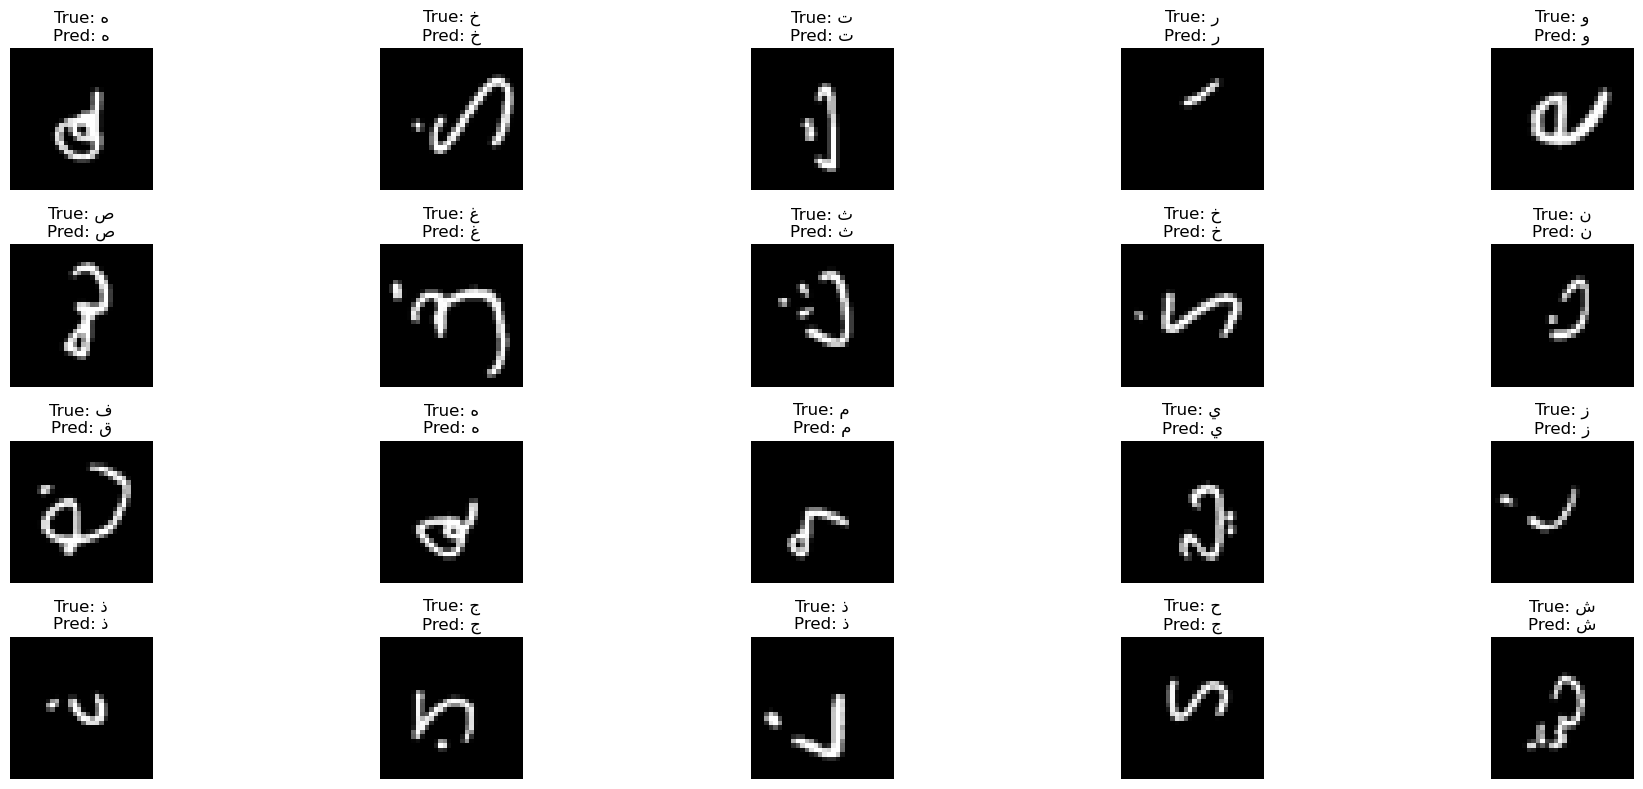

In [22]:
def visualize_predictions(images, true_labels, pred_labels, num_samples=20):
    
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    plt.figure(figsize=(20, 8))
    for i, idx in enumerate(indices):
        plt.subplot(4, 5, i + 1)
        img = images[idx].reshape(32, 32)
        plt.imshow(img, cmap='gray')
        true_char = class_mapping.get(true_labels[idx], f'Class {true_labels[idx]}')
        pred_char = class_mapping.get(pred_labels[idx], f'Class {pred_labels[idx]}')
        plt.title(f'True: {true_char}\nPred: {pred_char}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


print("\nVisualizing sample predictions...")
visualize_predictions(test_images, test_labels, y_pred_classes)

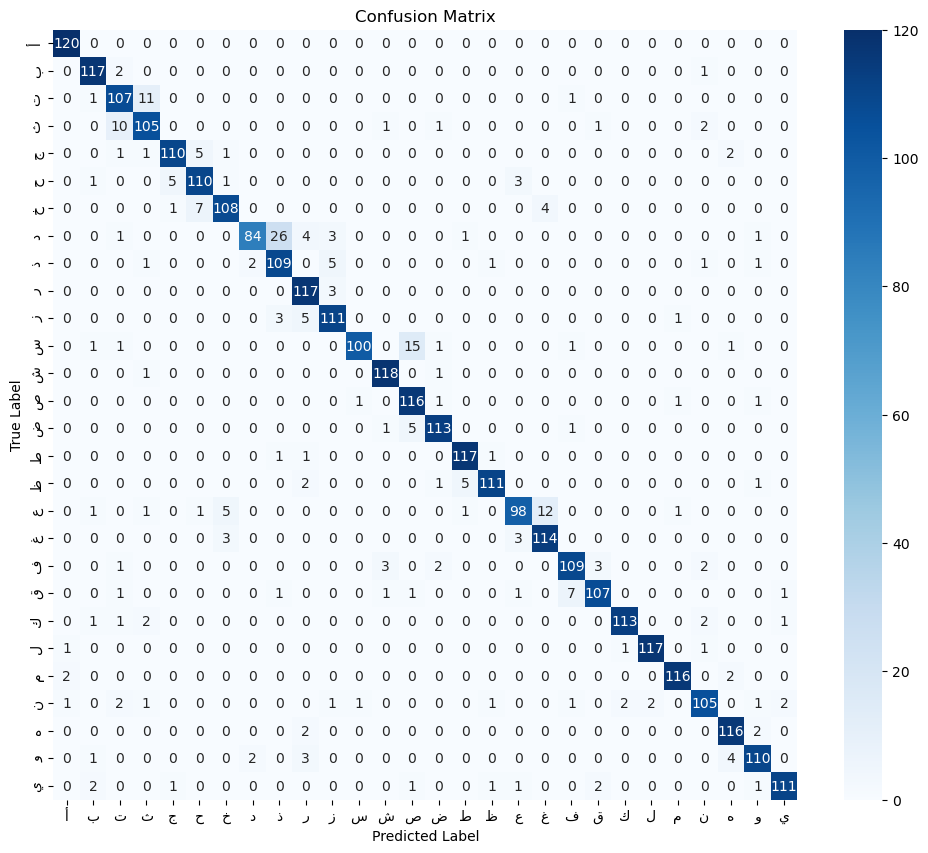

In [23]:
labels = [class_mapping[i] for i in sorted(class_mapping.keys())]

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
best_model.save('best_arabic_char_model.h5')
print("\nModel saved as 'best_arabic_char_model.h5'")



Model saved as 'best_arabic_char_model.h5'


In [ ]:
from joblib import dump

dump(best_model, 'best_model.joblib')


['best_model.joblib']